In [ ]:
import pandas as pd 
import numpy as np
import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data

<ipython-input-1-490a7f0d44b5>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
df_lyrics0 = pd.read_csv("data_lyrics.csv")
df_lyrics0.head(5)

,numCharts,Unnamed: 0,id,track,artist,lyrics,lyrics_translated,language,genres,genre,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,Anggi Marito,"Waktu demi waktu, hari demi hari \n Sadar ku t...","Time after time, day after day\n I realized my...",id,['indonesian pop'],pop,...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,1,2AaaE0qvFWtyT8srKNfRhH,Komang,Raim Laode,"Dari kejauhan, tergambar cerita tentang kita \...","From a distance, a story about us\n Separate d...",id,[],other,...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,2,6dXiWwFrcGieqnoLYzPNp5,Sial,Mahalini,Sampai saat ini tak terpikir olehku \n Aku per...,Until now I didn't think of me\n I once gave a...,id,['indonesian pop'],pop,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,3,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,"Mmm, mmm, mmm \n \n Flowers in hand, waiting ...","Mmm, mmm, mmm \n \n Flowers in hand, waiting ...",en,['pop'],pop,...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,4,5BKJAuVMDyrFvUTo4dIaiK,Not You,Alan Walker,"In my life, in my mind \n Where I make up stor...","In my life, in my mind \n Where I make up stor...",en,['electro house'],other,...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


In [ ]:
#import lyricsgenius as genius
# import pandas as pd
# import string 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')      


def search_data(query,n,access_token):
    """
    This function uses the library lyricsgenius to extract the fields
    title, artist, album, date and lyrics and stores them into a pandas dataframe

    parameters:
    query = artist or band to search
    n = max numbers of songs
    access_token = your access token of the genius api
    """
    
    api = genius.Genius(access_token)

    list_lyrics = []
    list_title = []
    list_artist = []
    list_album = []
    list_year = []

    artist = api.search_artist(query,max_songs=n,sort='popularity')
    songs = artist.songs
    for song in songs:
        list_lyrics.append(song.lyrics)
        list_title.append(song.title)
        list_artist.append(song.artist)
        list_album.append(song.album)
        list_year.append(song.year)

    df = pd.DataFrame({'artist':list_artist,'title':list_title,'album':list_album,
                        'date':list_year,'lyric':list_lyrics})
    
    return df

def clean_lyrics(df,column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 

    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()

    return df

def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word

    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song

    parameters:
    df = dataframe
    """
    years = []
    decades = []
    df['date'].fillna(0)
    df['date'] = df['date'].astype("str")
    for i in df.index:
        years.append(df['date'].str.split("-")[i][0])
    df['year'] = years
    df['year'] = df['year'].astype("int")

    for year in df['year']:
        if 1970 <= year < 1980:
            decades.append("70s")
        if 1980 <= year < 1990:
            decades.append("80s")
        if 1990 <= year < 2000:
            decades.append("90s")
        if 2000 <= year < 2010:
            decades.append("00s")
        if 2010 <= year :
            decades.append("10s")
    df['decade'] = decades
    df = df[['artist','title','album','decade','year','date','lyric']]
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_lyrics = clean_lyrics(df_lyrics0,'lyrics')
df_lyrics.head()

<ipython-input-4-52386e019b0d>:56: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
<ipython-input-4-52386e019b0d>:56: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
<ipython-input-4-52386e019b0d>:57: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
<ipython-input-4-52386e019b0d>:58: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace("\n"," ").

,numCharts,Unnamed: 0,id,track,artist,lyrics,lyrics_translated,language,genres,genre,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,Anggi Marito,waktu demi waktu hari demi hari sadar ku t'l...,"Time after time, day after day\n I realized my...",id,['indonesian pop'],pop,...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,1,2AaaE0qvFWtyT8srKNfRhH,Komang,Raim Laode,dari kejauhan tergambar cerita tentang kita ...,"From a distance, a story about us\n Separate d...",id,[],other,...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,2,6dXiWwFrcGieqnoLYzPNp5,Sial,Mahalini,sampai saat ini tak terpikir olehku aku pern...,Until now I didn't think of me\n I once gave a...,id,['indonesian pop'],pop,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,3,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,mmm mmm mmm flowers in hand waiting for m...,"Mmm, mmm, mmm \n \n Flowers in hand, waiting ...",en,['pop'],pop,...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,4,5BKJAuVMDyrFvUTo4dIaiK,Not You,Alan Walker,in my life in my mind where i make up storie...,"In my life, in my mind \n Where I make up stor...",en,['electro house'],other,...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


In [ ]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [ ]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df_lyrics = df_lyrics.reset_index(drop=True)
for word in df_lyrics['lyrics'].tolist():
    words.append(lyrics_to_words(word).split())

#create the new column with the information of words lists 
df_lyrics['words'] = words

In [ ]:
df_lyrics['words']

0     [waktu, demi, waktu, hari, demi, hari, sadar, ...
1     [dari, kejauhan, tergambar, cerita, tentang, k...
2     [sampai, saat, ini, tak, terpikir, olehku, aku...
3     [mmm, mmm, mmm, flower, hand, waiting, every, ...
4     [life, mind, make, story, time, pretend, someo...
5     [la, la, la, lalala, la, lalala, la, lalala, h...
6     [ive, busy, ignoring, hiding, heart, actually,...
7     [ohohohoh, sudah, kucoba, sepenuh, hati, untuk...
8     [bagaikan, sungai, yang, tak, punya, malu, men...
9     [mungkin, inilah, waktunya, mungkin, inilah, s...
10    [were, crowd, laughing, loud, nobody, know, we...
11    [look, star, look, shine, everything, yeah, ye...
12    [watch, sunrise, along, coast, were, getting, ...
13    [ku, terbangun, lagi, di, antara, sepi, hanya,...
14    [temanku, bilang, aku, akan, baikbaik, saja, n...
15    [im, packin, bag, unpack, last, time, im, sayi...
16    [di, tempat, ini, di, tempat, pertama, aku, me...
17    [kau, membunuhku, dengan, kepedihan, ini, 

In [ ]:
set_words = []
set_lang = []

for i in df_lyrics.index:
  for word in df_lyrics['words'].iloc[i]:
    set_words.append(word)
    set_lang.append(df_lyrics['language'].iloc[i])

words_df = pd.DataFrame({'words':set_words, 'language':set_lang})

In [ ]:
words_df.head()

,words,language
0,waktu,id
1,demi,id
2,waktu,id
3,hari,id
4,demi,id


In [ ]:
stop_words = ["yang", "dan", "di", "dari", "ke", "ro", "nong", "untuk", "engkau", "kamu", "dia", "adalah", "eh", "dalam", "the", "is", "and", "in", "of", "to"]
cv = CountVectorizer(stop_words=stop_words)

text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names_out())
data_cv['language'] = words_df['language']

In [ ]:
vect_words = data_cv.groupby('language').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

In [ ]:
vect_words

,words,en,id,ko
0,abadi,0,1,0
1,abc,0,0,1
2,across,2,0,0
3,actually,1,0,0
4,ada,0,26,0
...,...,...,...,...
1854,파란,0,0,1
1855,하나,0,0,1
1856,하나뿐인,0,0,1
1857,하얀,0,0,1


In [ ]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

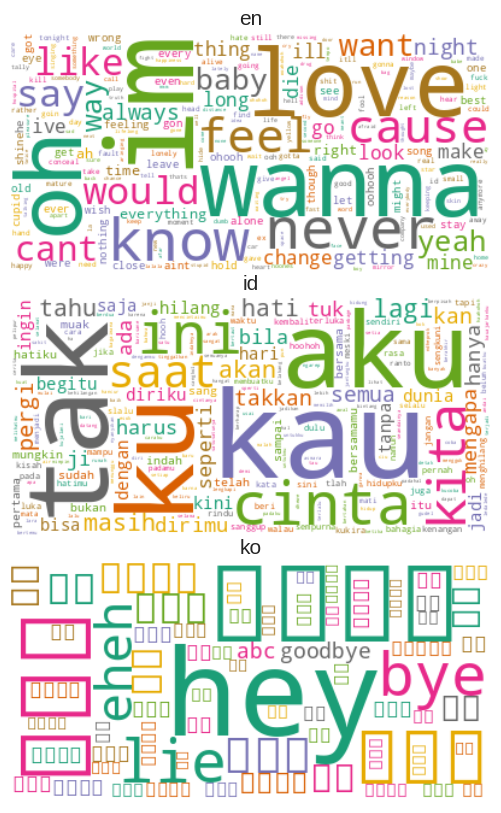

In [ ]:
plot_wordcloud(vect_words,3,1)

In [ ]:
vect_words.to_csv('vect_words.csv')